In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from zipfile import ZipFile
import os
import seaborn as sns

pd.options.mode.chained_assignment = None

In [2]:
# specifiy location of data
df = pd.read_csv("/home/rthoms/ocean_dep/sur_B/nutrition_table_clean.csv")

df.sg_dep_cat = pd.Categorical(df.sg_dep_cat,categories=["none","mod","high"],ordered=True)
df.scientific = pd.Categorical(df.scientific,categories=
                                    ['Sillago sihama', 'Gerres oyena', 'Gerres longirostris',
                                    'Teraponidae', 'Crenidens crenidens', 'Caranginae',
                                    'Rastrellinger kanagurta', 'Portunus pelagicus', 'scylla serrata ',
                                    'Penaeus monodon', 'Loliginidae', 'Penaeidae', 'Pinna muricata',
                                    'Margaritidae', 'Tapes literatus', 'Siliqua polita', 'Solenidae',
                                    'Garfarium pectinatum', 'Serratina capsoides', 'Callista florida',
                                    'Potamididae', 'Volema pyrum','land-based meat'],ordered=True)

df.drop('Unnamed: 0', axis=1, inplace=True)
df

,nutrition_source,gitonga_s,gitonga_p,portuguese,scientific,family,phylum,category,focal,sg_dep_median,sg_dep_cat,nutrition_prop_hot_raw,nutrition_prop_hot,nutrition_prop_cold_raw,nutrition_prop_cold,ParentGlobalID,ccp,gender,fish_pract,pract_cat
0,1,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,0.0,none,2,0.066667,2,0.066667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,nhamua,f,glean,glean
1,1,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,0.0,none,4,0.133333,4,0.133333,caac8748-ebed-413c-a5d2-a635b5bd8932,nhampossa,m,fence_trap,fish
2,1,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,0.0,none,5,0.166667,3,0.100000,a9325c3b-f81d-431a-9628-6b0b57ede5e3,nhampossa,f,gill_net,fish
3,1,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,0.0,none,3,0.100000,3,0.100000,be5b94c1-65c2-44dc-af3c-8a0c1f35f055,madava,m,drag_net,fish
4,1,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,0.0,none,8,0.266667,8,0.266667,8407b1b2-9c62-4161-a560-a8c8415ca76a,madava,m,gill_net,fish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,99,NaN,NaN,carne,NaN,nonfish_meat,NaN,NaN,NaN,0.0,none,6,0.200000,8,0.266667,074701a4-86f2-4beb-a67e-b12fc841f7fe,kuguana,f,drag_net,fish
951,99,NaN,NaN,carne,NaN,nonfish_meat,NaN,NaN,NaN,0.0,none,3,0.100000,0,0.000000,368b8b4c-a618-434a-8ebe-7f7fa8c143fc,kuguana,m,drag_net,fish
952,99,NaN,NaN,carne,NaN,nonfish_meat,NaN,NaN,NaN,0.0,none,2,0.066667,2,0.066667,454f8afd-86aa-4418-80e3-4e1ccb572b8c,kuguana,m,fence_trap,fish
953,99,NaN,NaN,carne,NaN,nonfish_meat,NaN,NaN,NaN,0.0,none,3,0.100000,0,0.000000,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,kuguana,m,fence_trap,fish


In [3]:
sample_dict={'fish': 48, 'glean': 32, 'shrimp_net': 32}

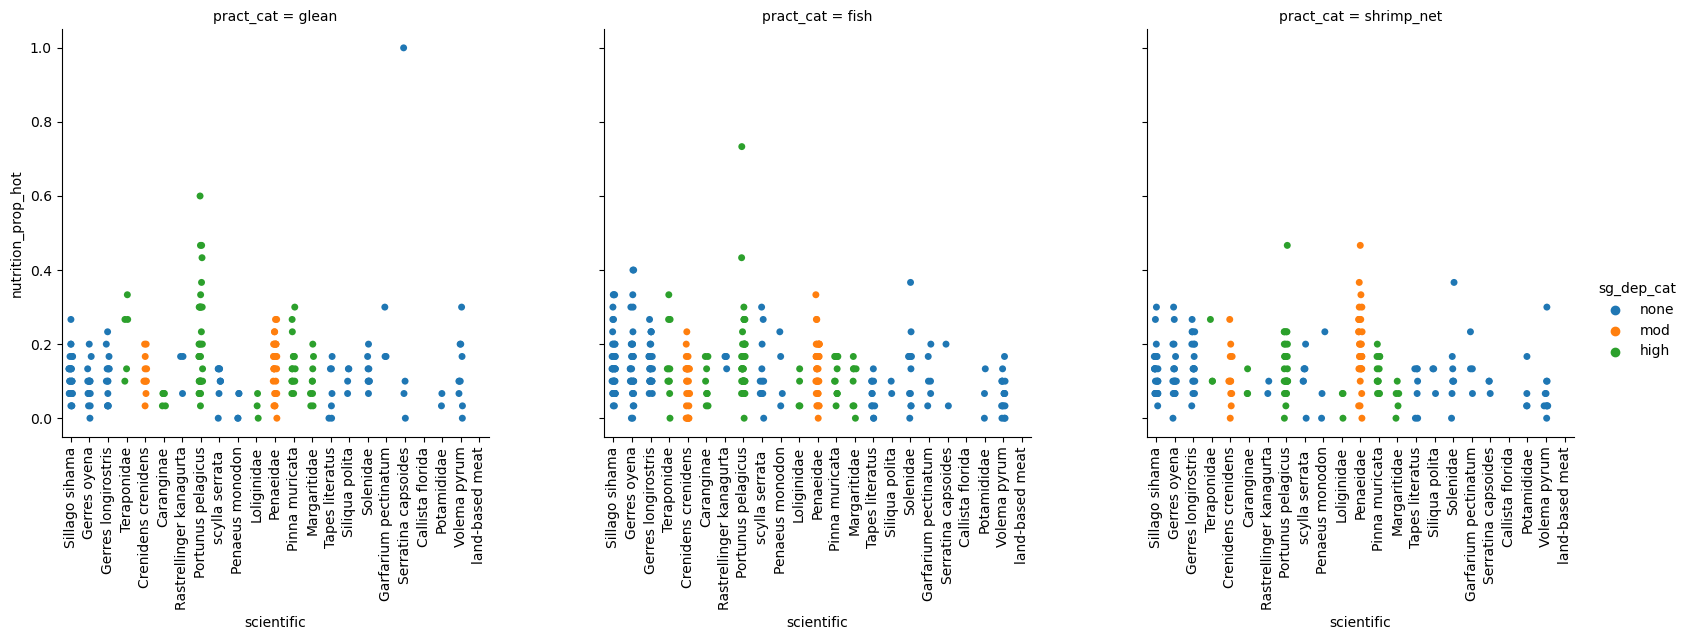

In [4]:
ax= sns.catplot(data=df, x="scientific", y="nutrition_prop_hot", col = 'pract_cat', hue = 'sg_dep_cat', dodge=False )
ax.fig.set_size_inches(17,5)
ax.set_xticklabels(rotation=90)

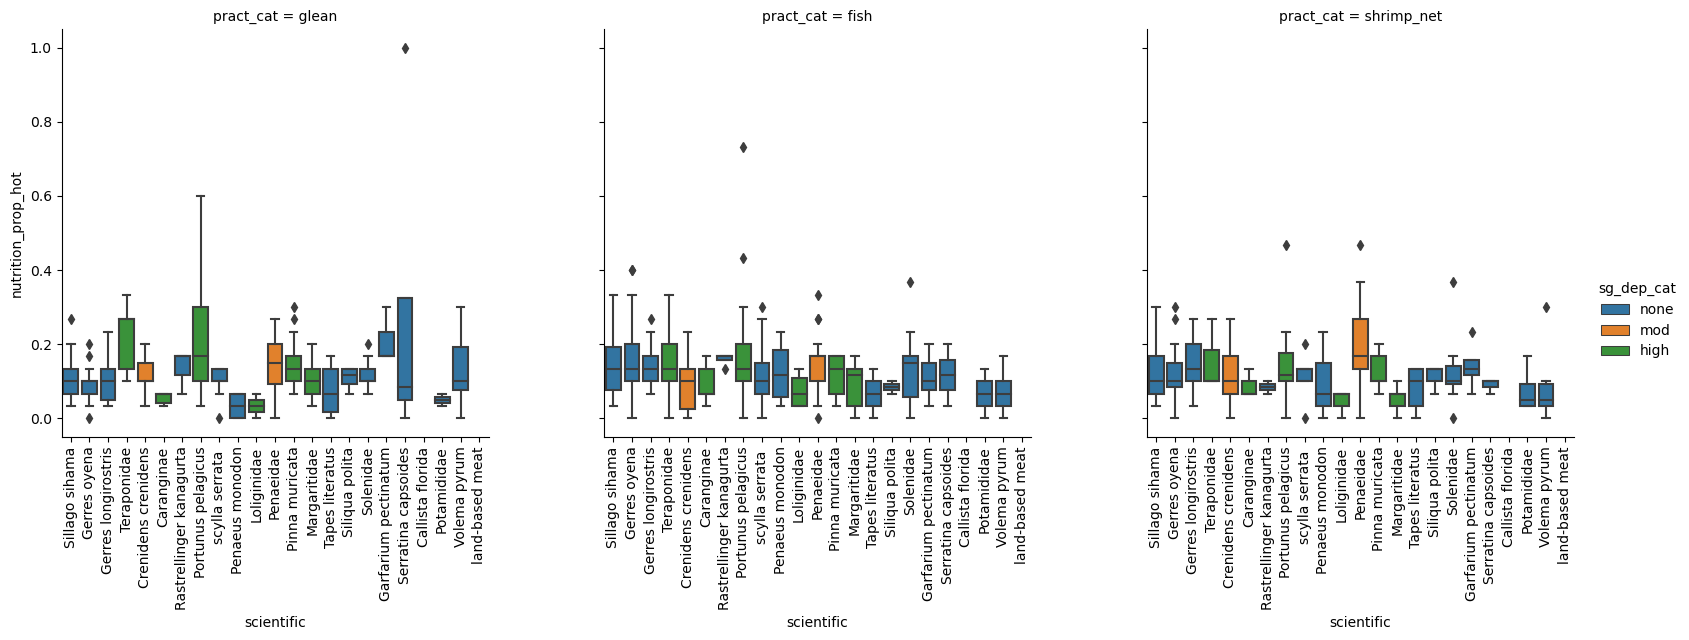

In [5]:
ax= sns.catplot(data=df, x="scientific", y="nutrition_prop_hot", kind = 'box', col = 'pract_cat', hue = 'sg_dep_cat', dodge=False )
ax.fig.set_size_inches(17,5)
ax.set_xticklabels(rotation=90)

In [6]:
def weighted_av(pract,med, count):
    sample_size=sample_dict[pract]
    wa= med*(int(count)/sample_size)
    return wa

In [7]:
df_agg = df.groupby(['scientific','pract_cat']).agg(med_hot=('nutrition_prop_hot', np.median), med_cold=('nutrition_prop_cold', np.median),count = ('ParentGlobalID', 'count'), sg_dep_cat= ('sg_dep_cat', 'first')).reset_index() 
df_agg['weighted_av_hot'] = df_agg.apply(lambda row: weighted_av(row['pract_cat'], row['med_hot'],  row['count']), axis=1)
df_agg

,scientific,pract_cat,med_hot,med_cold,count,sg_dep_cat,weighted_av_hot
0,Sillago sihama,fish,0.133333,0.100000,42,none,0.116667
1,Sillago sihama,glean,0.100000,0.100000,28,none,0.087500
2,Sillago sihama,shrimp_net,0.100000,0.100000,29,none,0.090625
3,Gerres oyena,fish,0.133333,0.133333,33,none,0.091667
4,Gerres oyena,glean,0.100000,0.100000,17,none,0.053125
...,...,...,...,...,...,...,...
64,Volema pyrum,glean,0.100000,0.100000,10,none,0.031250
65,Volema pyrum,shrimp_net,0.050000,0.050000,10,none,0.015625
66,land-based meat,fish,NaN,NaN,0,NaN,NaN
67,land-based meat,glean,NaN,NaN,0,NaN,NaN


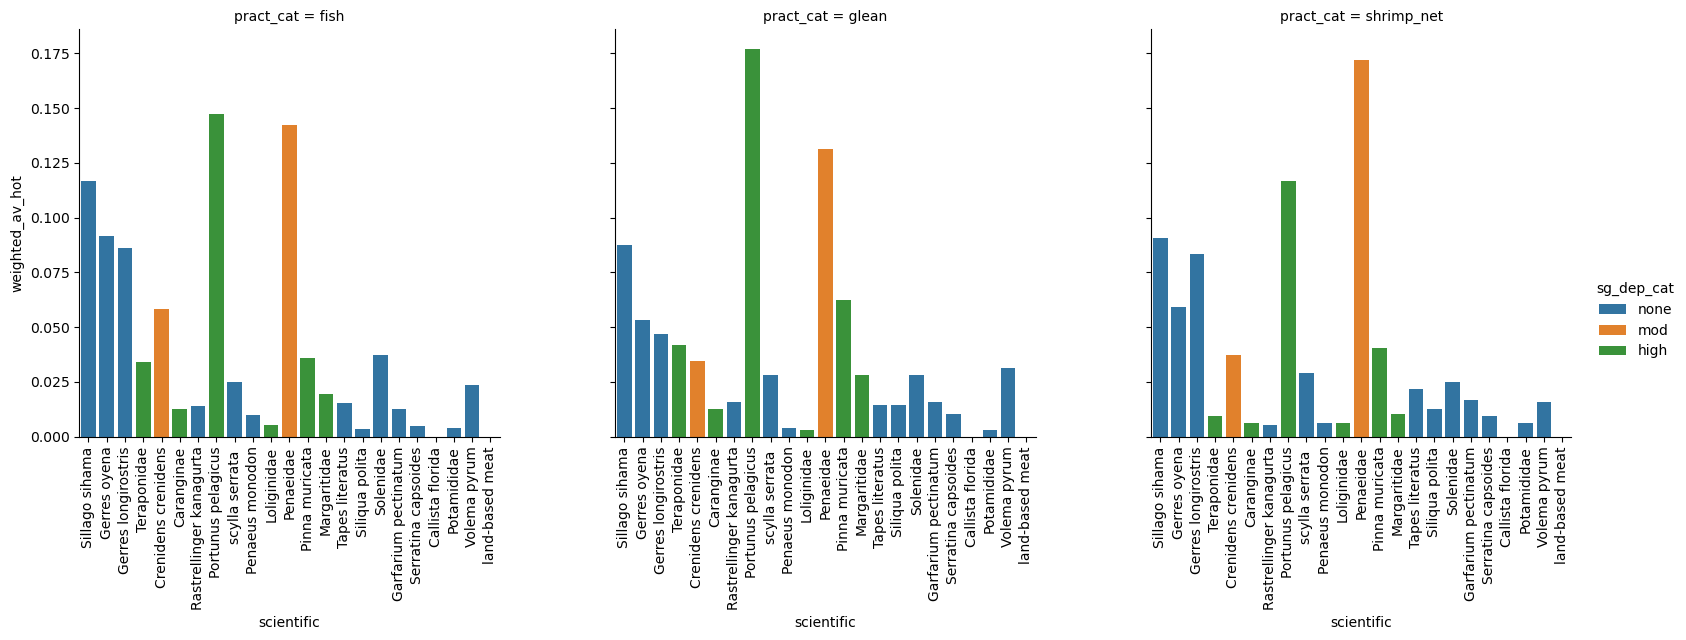

In [8]:
ax= sns.catplot(data=df_agg, x="scientific", y="weighted_av_hot", kind = 'bar', col = 'pract_cat', hue = 'sg_dep_cat', dodge=False )
ax.fig.set_size_inches(17,5)
ax.set_xticklabels(rotation=90)

In [9]:
df_agg_sg = df.groupby(['sg_dep_cat','pract_cat']).agg(med_hot=('nutrition_prop_hot', np.median),med_cold=('nutrition_prop_cold', np.median), count = ('ParentGlobalID', pd.Series.nunique)).reset_index() 
df_agg_sg['weighted_av_hot'] = df_agg_sg.apply(lambda row: weighted_av(row['pract_cat'], row['med_hot'],  row['count']), axis=1)
df_agg_sg

,sg_dep_cat,pract_cat,med_hot,med_cold,count,weighted_av_hot
0,none,fish,0.100000,0.100000,54,0.112500
1,none,glean,0.100000,0.100000,35,0.109375
2,none,shrimp_net,0.100000,0.100000,34,0.106250
3,mod,fish,0.133333,0.133333,48,0.133333
4,mod,glean,0.133333,0.116667,30,0.125000
5,mod,shrimp_net,0.166667,0.166667,33,0.171875
6,high,fish,0.133333,0.133333,54,0.150000
7,high,glean,0.133333,0.133333,34,0.141667
8,high,shrimp_net,0.100000,0.133333,34,0.106250
